# Reading Data 

In [ ]:
import pandas as pd

df=pd.read_csv(
    'counsel_chat.csv',
    delimiter=','
)

In [ ]:
df.head()

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train


# Discovering Data 

In [ ]:
# number of answrers 
len(df)

2129

In [ ]:
#topics
df.groupby(["topic", "questionID"]).agg("count").reset_index().groupby("topic").agg("count")["questionID"].sort_values(ascending=False)

topic
depression                  132
relationships               101
intimacy                    100
anxiety                      88
family-conflict              58
parenting                    54
self-esteem                  42
relationship-dissolution     31
behavioral-change            29
anger-management             25
trauma                       22
marriage                     20
domestic-violence            16
lgbtq                        15
counseling-fundamentals      11
workplace-relationships      11
social-relationships         11
substance-abuse              10
grief-and-loss                8
spirituality                  7
legal-regulatory              6
professional-ethics           6
diagnosis                     6
sleep-improvement             5
human-sexuality               4
eating-disorders              4
stress                        3
addiction                     3
self-harm                     2
children-adolescents          2
military-issues               1
Na

In [ ]:
# number of topics
len(set(df["topic"].tolist()))

31

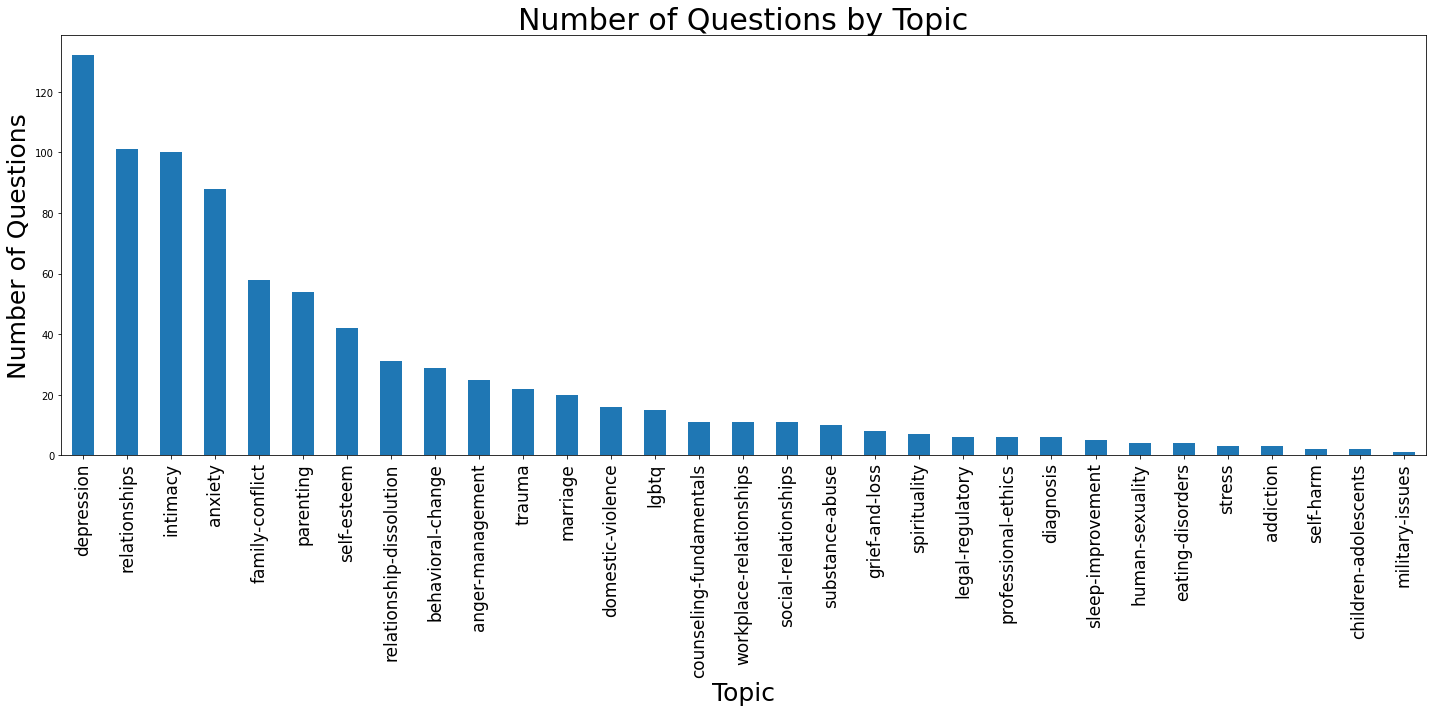

In [ ]:
import matplotlib.pyplot as plt
# Number of questsions asked per topic
fig, ax = plt.subplots(figsize=(20, 10))
df.groupby(["topic", "questionID"]).agg("count").reset_index().groupby("topic").agg("count")["questionID"].sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Number of Questions by Topic", fontsize=30)
ax.set_ylabel("Number of Questions", fontsize=25)
ax.set_xlabel("Topic", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
plt.tight_layout()
plt.savefig("number_of_questions_by_topic.png")

# Preprocessing the data 

In [ ]:
# selectiong topics 
topic_list= ['depression' ,'relationships'	,'intimacy'	,'anxiety'  ,'family-conflict'  ,	'parenting' , 	'self-esteem']  
filtered_df= df[df.topic.isin(topic_list)]
len(filtered_df)

1302

In [ ]:
# remove duplicated questions 
filtered_df=filtered_df.drop_duplicates(subset='questionText', keep="last")
len(filtered_df)

575

In [ ]:
import numpy
Frequencies=numpy.array(filtered_df.groupby(["topic", "questionID"]).agg("count").reset_index().groupby("topic").agg("count")["questionID"].sort_values(ascending=False))
Frequencies / len(filtered_df) * 100 

array([22.95652174, 17.56521739, 17.39130435, 15.30434783, 10.08695652,
        9.39130435,  7.30434783])

In [ ]:
# adding labeles to the bar chart 
def addlabels(n,y):
    for i in range(n):
        plt.text(i, y[i], y[i], ha = 'center',fontsize=25)

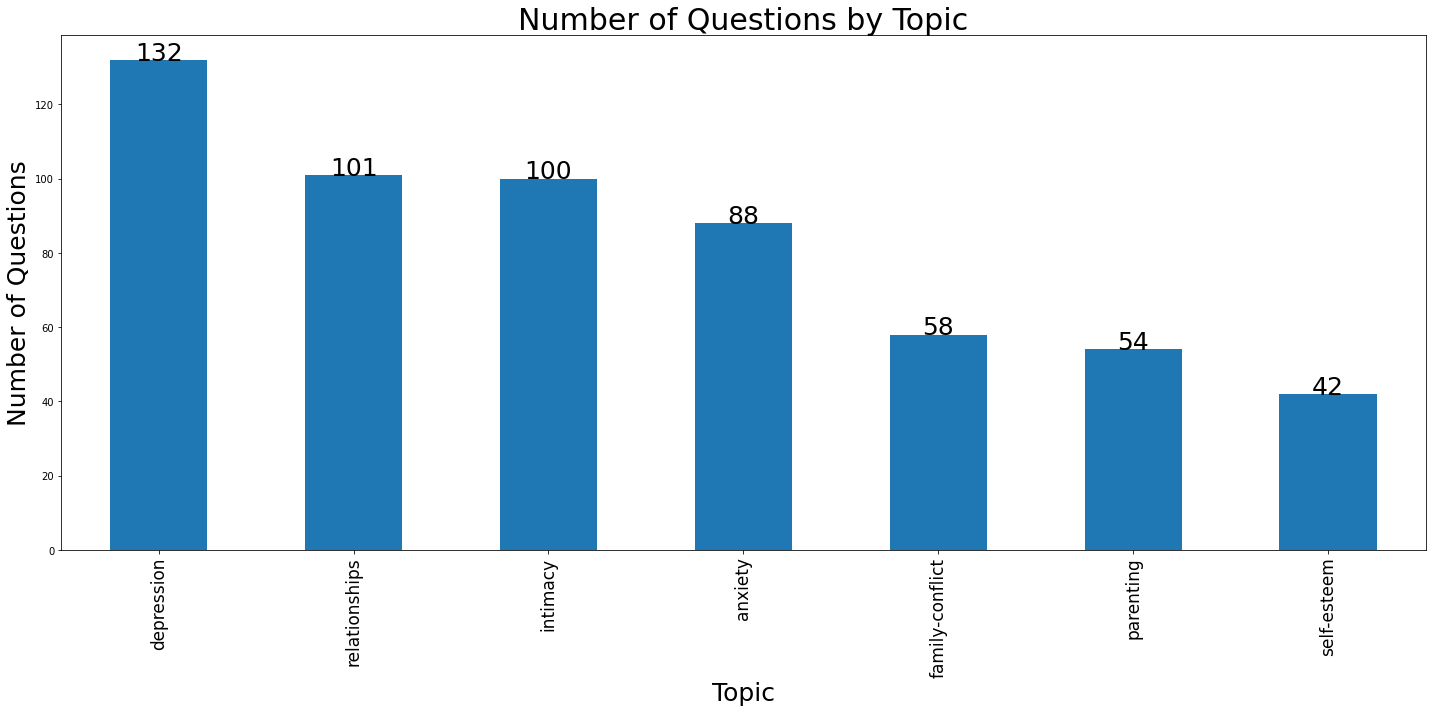

In [ ]:
import matplotlib.pyplot as plt
# Number of questsions asked per topic
fig, ax = plt.subplots(figsize=(20, 10))
filtered_df.groupby(["topic", "questionID"]).agg("count").reset_index().groupby("topic").agg("count")["questionID"].sort_values(ascending=False).plot.bar(ax=ax)
n=7
addlabels(n,Frequencies)
ax.set_title("Number of Questions by Topic", fontsize=30)
ax.set_ylabel("Number of Questions", fontsize=25)
ax.set_xlabel("Topic", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
plt.tight_layout()
plt.savefig("number_of_questions_by_topic.png")

# Exploring  the data again

In [ ]:
# questionts length 

df_col_max_len = int(filtered_df['questionTitle'].str.encode(encoding='utf-8').str.len().max())
print ('maximum quastion length ', df_col_max_len)

df_col_min_len = int(filtered_df['questionTitle'].str.encode(encoding='utf-8').str.len().min())
print ('minimum question length ', df_col_min_len)

df_col_avg_len = int(filtered_df['questionTitle'].str.encode(encoding='utf-8').str.len().mean())
print ('Average question length ', df_col_avg_len)

df_col_avg_len = int(filtered_df['questionTitle'].str.encode(encoding='utf-8').str.len().median())
print ('Median question length ', df_col_avg_len)

maximum quastion length  138
minimum question length  16
Average question length  52
Median question length  51


In [ ]:
len(filtered_df)

575

# Shuffle the data

In [ ]:
# shuffle the DataFrame rows # reproduicable 
filtered_df = filtered_df.sample(frac = 1,random_state=0)

In [ ]:
filtered_df

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
1281,1281,566,What should I do if my boyfriend can't get ove...,My boyfriend can't get over my promiscuous pas...,https://counselchat.com/questions/what-should-...,intimacy,"Kristi King-Morgan, LMSWSocial Worker, Psychot...",https://counselchat.com/therapists/kristi-king...,I am sorry to hear of your relationship strugg...,2,281,train
290,290,99,I feel guilty because I didn't say no to a guy...,I was in a situation with a guy. He’s my broth...,https://counselchat.com/questions/i-feel-guilt...,depression,"Lynda MartensMarriage & Family Therapist, MSc,...",https://counselchat.com/therapists/ms-lynda-ma...,"Hi Tennessee, There is nothing wrong with you....",1,105,train
1537,1537,684,My ex-boyfriend say we're finished but still a...,I've been with a man for four years. For the l...,https://counselchat.com/questions/my-ex-boyfri...,relationships,"Lauren Ostrowski, MA, LPC, NCC, DCC, CCTPI tai...",https://counselchat.com/therapists/lauren-ostr...,This can be difficult and confusing.If you thi...,0,131,train
1384,1384,603,How do I find a therapist for my family as a m...,I’m a teenager. My entire family needs family ...,https://counselchat.com/questions/how-do-i-fin...,family-conflict,"Vivian D. Echevarria Guzman, MSC, LPC-S, NCCBi...",https://counselchat.com/therapists/vivian-d-ec...,This is a question that I often get from patie...,0,522,val
1572,1572,702,I just feel so alone,I feel so alone. I have so many people around ...,https://counselchat.com/questions/i-just-feel-...,relationships,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,You ask a very deep and sensitive question whi...,0,44,train
...,...,...,...,...,...,...,...,...,...,...,...,...
737,737,290,I Sometimes I feel like I hate myself,I feel like I hate myself physically and emoti...,https://counselchat.com/questions/i-sometimes-...,self-esteem,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,This happens slowly and can be done.You alread...,0,65,val
100,100,9,Why does it feel as if self-harm is an addiction?,"I self-harm, and I stop for awhile. Then when ...",https://counselchat.com/questions/why-does-it-...,depression,Jennifer GerlachYour Story Matters,https://counselchat.com/therapists/jennifer-ge...,Self-harm has a way of becoming a go-to method...,0,42,val
1199,1199,507,How do I handle my fiancée always telling me h...,My fiancée is always letting me know how I am ...,https://counselchat.com/questions/how-do-i-han...,intimacy,"Lauren Ostrowski, MA, LPC, NCC, DCC, CCTPI tai...",https://counselchat.com/therapists/lauren-ostr...,One thing you could try is to have a conversat...,0,77,val
534,534,202,Why am I so anxious in social situations?,Whenever I have to speak in public or be in bi...,https://counselchat.com/questions/why-am-i-so-...,anxiety,Sonya WilsonLicensed Professional Counselor,https://counselchat.com/therapists/sonya-wilson,"As you do it more, it should get better or at ...",0,54,train


# Spliting into training and testing

In [ ]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

dtf_train, dtf_test = model_selection.train_test_split(filtered_df, test_size=0.3,random_state=1)
## get target
y_train = dtf_train["topic"].values
y_test = dtf_test["topic"].values
len(y_train )

402

# Statistics about train & test 

In [ ]:
print (pd.DataFrame(y_train).value_counts())

depression         91
relationships      75
intimacy           67
anxiety            64
family-conflict    40
parenting          34
self-esteem        31
dtype: int64


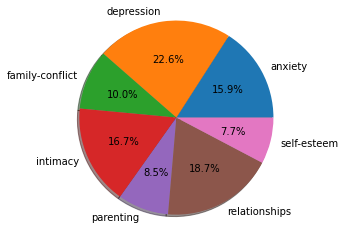

In [ ]:
import matplotlib.pyplot as plt

labels = pd.DataFrame(y_train)[0].astype('category').cat.categories.tolist()
counts =  pd.DataFrame(y_train)[0].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.savefig("distibution of labels throghou_training_set.png")
plt.show()

In [ ]:
# numpy array 
numpy.array(pd.DataFrame(y_train).value_counts()) / len(y_train) *100

array([22.63681592, 18.65671642, 16.66666667, 15.92039801,  9.95024876,
        8.45771144,  7.71144279])

In [ ]:
print (pd.DataFrame(y_test).value_counts())

depression         41
intimacy           33
relationships      26
anxiety            24
parenting          20
family-conflict    18
self-esteem        11
dtype: int64


In [ ]:
# numpy array 
numpy.array(pd.DataFrame(y_test).value_counts()) / len(y_test) *100

array([23.69942197, 19.07514451, 15.02890173, 13.87283237, 11.56069364,
       10.40462428,  6.3583815 ])

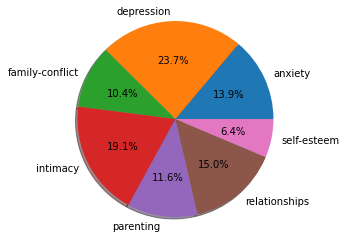

In [ ]:
import matplotlib.pyplot as plt

labels = pd.DataFrame(y_test)[0].astype('category').cat.categories.tolist()
counts =  pd.DataFrame(y_test)[0].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
plt.savefig("distibution of labels throghou_testing_set.png")
ax1.axis('equal')

plt.show()

In [ ]:
dtf_train.head(2)

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
1647,1647,752,Should I get back together with my ex-boyfrien...,My ex-boyfriend and I met over a year ago. We ...,https://counselchat.com/questions/should-i-get...,relationships,"Nat RomanMarriage & Family Therapist, MSc RP",https://counselchat.com/therapists/nat-roman-t...,Trust is essential in romantic relationships a...,2,282,train
1386,1386,604,What's wrong with me for going to summer school?,"It's the way my mom said I was worth nothing, ...",https://counselchat.com/questions/what-s-wrong...,family-conflict,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,Your mom is telling you cruel words.The fact t...,0,93,val


# TF_IDF

In [ ]:
# Feature Engineering, the process to create features by extracting information from the data. I am going to use the Tf-Idf vectorizer with a limit of 10,000 words 

## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [ ]:
#Now I will use the vectorizer on the preprocessed corpus of the train set to extract a vocabulary and create the feature matrix.
corpus = dtf_train["questionTitle"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
dic_vocabulary = vectorizer.vocabulary_
X_train.shape

(402, 3078)

In [ ]:
X_train

<402x3078 sparse matrix of type '<class 'numpy.float64'>'
	with 7050 stored elements in Compressed Sparse Row format>

# Feature Selection

In [ ]:
# feature selection '
import numpy as np 
import sklearn.feature_selection 

y = dtf_train["topic"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = sklearn.feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

# Top Features

In [ ]:
# checking reducing number of features

y = dtf_train["topic"]

import numpy as np 
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["y"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==cat]["feature"].values[:10]))
   print(" ")

# anxiety:
  . selected features: 3078
  . top features: social,social anxiety,anxiety,fear,anxious,paranoia,have social,situations,social situations,stop worrying
 
# depression:
  . selected features: 3078
  . top features: depression,depressed,my depression,have depression,depression and,feeling,stop feeling,feeling empty,and anxiety,empty
 
# family-conflict:
  . selected features: 3078
  . top features: my mom,mom,bisexual,own,family,cousin,my brother,an affair,had an,the family
 
# intimacy:
  . selected features: 3078
  . top features: sex,my wife,my husband,husband,wife,with me,marriage,of sex,open up,up to
 
# parenting:
  . selected features: 3078
  . top features: daughter,my daughter,son,their,child,children,step,my son,should leave,leave my
 
# relationships:
  . selected features: 3078
  . top features: he,boyfriend,relationship,himself,crush,in relationship,do start,my boyfriend,abuse,new husband
 
# self-esteem:
  . selected features: 3078
  . top features: forgive,can 

# only if feature selection is done

In [ ]:
#  giving this new set of words as input.
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

# training the classifier 

In [ ]:
classifier = naive_bayes.MultinomialNB()

## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["questionTitle"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

# evaluating Naive Bayes

In [ ]:
from sklearn import metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))    

Accuracy: 0.35
Auc: 0.77
Detail:
                 precision    recall  f1-score   support

        anxiety       0.56      0.21      0.30        24
     depression       0.34      0.88      0.49        41
family-conflict       0.00      0.00      0.00        18
       intimacy       0.41      0.33      0.37        33
      parenting       0.00      0.00      0.00        20
  relationships       0.29      0.35      0.32        26
    self-esteem       0.00      0.00      0.00        11

       accuracy                           0.35       173
      macro avg       0.23      0.25      0.21       173
   weighted avg       0.28      0.35      0.28       173



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


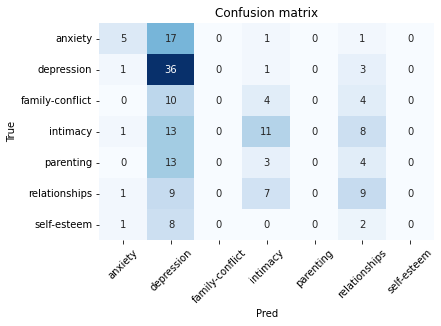

In [ ]:
import seaborn as sns
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.savefig("confusion matrix_Bayes+tf_idf.png", dpi=100, bbox_inches='tight')


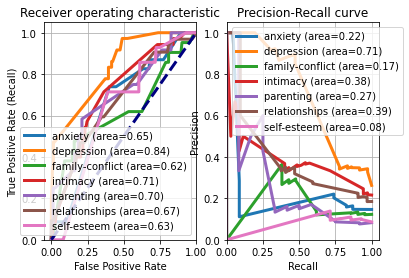

In [ ]:
## Plot roc
fig, ax = plt.subplots(nrows=1, ncols=2)

for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

# Cross Validation

y_train , y_test

In [ ]:
len(dtf_train['questionTitle'])

402

In [ ]:
len(dtf_test['questionTitle'])

173

In [ ]:
# cross validation for bayes

# cross vlidation evaluating random forest
from numpy import mean , std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = naive_bayes.MultinomialNB()
# evaluate model
scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.458 (0.051)


# TF_IDF + Text preprocessing

In [ ]:
# function to preprocess
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   
    #characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# preprocess text
import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
lst_stopwords=stopwords.words()
filtered_df["questionTitle"] = filtered_df["questionTitle"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=False, 
          lst_stopwords=lst_stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# resplit
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

dtf_train, dtf_test = model_selection.train_test_split(filtered_df, test_size=0.3,random_state=1)
## get target
y_train = dtf_train["topic"].values
y_test = dtf_test["topic"].values
len(y_train )

print (pd.DataFrame(y_train).value_counts())

depression         91
relationships      75
intimacy           67
anxiety            64
family-conflict    40
parenting          34
self-esteem        31
dtype: int64


In [ ]:
# feature Engineering 
# Feature Engineering, the process to create features by extracting information from the data. I am going to use the Tf-Idf vectorizer with a limit of 10,000 words 

## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [ ]:
# extract a voculabry and create feature matrix
#Now I will use the vectorizer on the preprocessed corpus of the train set to extract a vocabulary and create the feature matrix.
corpus = dtf_train["questionTitle"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
dic_vocabulary = vectorizer.vocabulary_
X_train.shape

(402, 1966)

In [ ]:
# top features


# feature selection '
import numpy as np 
import sklearn.feature_selection 

y = dtf_train["topic"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0/95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = sklearn.feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

# checking reducing number of features

y = dtf_train["topic"]

import numpy as np 
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["y"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==cat]["feature"].values[:10]))
   print(" ")

# anxiety:
  . selected features: 103
  . top features: anxiety,fear,anxious,social,paranoia,situations,worrying,attacks,depression,husband
 
# depression:
  . selected features: 103
  . top features: depression,depressed,feeling,empty,happy,anxiety,relationship,sex,social,guy
 
# family-conflict:
  . selected features: 103
  . top features: mom,cousin,mother,family,almost,bisexual,stress,decisions,gay,stepdad
 
# intimacy:
  . selected features: 103
  . top features: husband,sex,wife,lied,depression,anxiety,relationship,depressed,child,daughter
 
# parenting:
  . selected features: 103
  . top features: daughter,child,kids,children,isnt,dislike,disability,wedge,kill,along
 
# relationships:
  . selected features: 103
  . top features: relationship,hes,guy,crush,anxiety,depression,mother,depressed,child,family
 
# self-esteem:
  . selected features: 103
  . top features: forgive,ugly,starting,save,confident,desperate,enough,abandonment,cry,look
 


In [ ]:
#  giving this new set of words as input.
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

# train

# evaluate
classifier = naive_bayes.MultinomialNB()

## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["questionTitle"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

from sklearn import metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))    

Accuracy: 0.4
Auc: 0.75
Detail:
                 precision    recall  f1-score   support

        anxiety       0.71      0.42      0.53        24
     depression       0.33      0.83      0.47        41
family-conflict       0.67      0.33      0.44        18
       intimacy       0.33      0.15      0.21        33
      parenting       1.00      0.35      0.52        20
  relationships       0.33      0.31      0.32        26
    self-esteem       0.00      0.00      0.00        11

       accuracy                           0.40       173
      macro avg       0.48      0.34      0.36       173
   weighted avg       0.48      0.40      0.38       173



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


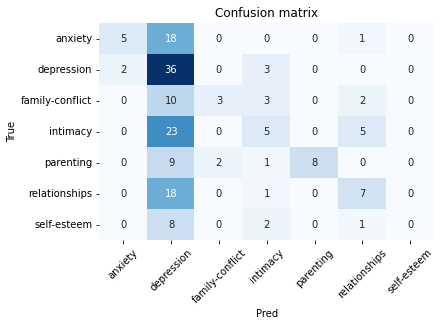

In [ ]:
import seaborn as sns
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.savefig("confusion matrix_Bayes+tf_idf.png", dpi=100, bbox_inches='tight')

# loading BERT pretrained model

In [ ]:
#installing the huggingface transformers library so we can load our deep learning NLP model.
!pip install transformers

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 41.9 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 895 kB 71.5 MB/s 
     |████████████████████████████████| 636 kB 33.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers as ppb

# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# preparing the data 

In [ ]:
# extra shuffle 

filtered_df = filtered_df.sample(frac = 1)

In [ ]:
# remove duplicates 
filtered_df2 = filtered_df.drop_duplicates(['questionLink'], keep='last')
len(filtered_df2)

575

In [ ]:
# encoding target label 
#filtered_df2['topic'] = filtered_df2['topic'].astype('category')
#filtered_df2['topic_encoded'] = filtered_df2['topic'].cat.codes
#filtered_df2
replace_map = {'topic': {'depression': 1, 'relationships':2, 'intimacy': 3, 'anxiety': 4, 'family-conflict': 5,
                                  'parenting': 6, 'self-esteem':7}}
filtered_df2.replace(replace_map, inplace=True)

In [ ]:
filtered_df2

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
1619,1619,727,My boyfriend says he needs time to think about us,I found out my boyfriend takes anti-depression...,https://counselchat.com/questions/my-boyfriend...,2,"Mark Morris, LCSWTherapist and Author of Livin...",https://counselchat.com/therapists/mark-morris...,This seems like two questions. The first is w...,0,268,train
251,251,70,How do I balance school and life?,I don't have time to live or take care of myse...,https://counselchat.com/questions/how-do-i-bal...,1,"Lauren Ostrowski, MA, LPC, NCC, DCC, CCTPI tai...",https://counselchat.com/therapists/lauren-ostr...,I'm not sure whether you are referring to havi...,0,29,train
537,537,205,Why am I all of a sudden having issues communi...,I started seeing this guy that I met at a mutu...,https://counselchat.com/questions/why-am-i-all...,4,Sonya WilsonLicensed Professional Counselor,https://counselchat.com/therapists/sonya-wilson,Sounds like you are struggling with your own n...,0,58,val
682,682,255,What can I do about my dad?,My dad makes me feel like shit and like I'm wo...,https://counselchat.com/questions/what-can-i-d...,6,"Kristi King-Morgan, LMSWSocial Worker, Psychot...",https://counselchat.com/therapists/kristi-king...,Are you old enough to move out? Then by all me...,0,63,train
1374,1374,598,How should I deal with my mom's controlling be...,"I'm an adult, facing problems with my mom. She...",https://counselchat.com/questions/how-should-i...,5,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,The part of your life which is in your control...,0,16,train
...,...,...,...,...,...,...,...,...,...,...,...,...
1572,1572,702,I just feel so alone,I feel so alone. I have so many people around ...,https://counselchat.com/questions/i-just-feel-...,2,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,You ask a very deep and sensitive question whi...,0,44,train
262,262,81,Is my depression sabotaging my job search?,I keep feeling paralyzed and unsure during int...,https://counselchat.com/questions/is-my-depres...,1,Ben BraaksmaMental Health Counselor,https://counselchat.com/therapists/ben-braaksma,It sounds like you are feeling pretty overwhel...,0,136,train
1158,1158,491,What can I do about my fiancé putting his fami...,My fiancé of 15 years is always helping out hi...,https://counselchat.com/questions/what-can-i-d...,3,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,Congrats on your upcoming wedding!Have you tol...,0,140,train
281,281,92,How can I deal with my posttraumatic stress di...,"I feel angry, anxious, and depressed. The PTSD...",https://counselchat.com/questions/how-can-i-de...,1,"Candice Conroy, MAFind relief from anxiety, de...",https://counselchat.com/therapists/candice-con...,If the symptoms are to the extent that they ar...,0,47,train


In [ ]:
batch_1 = filtered_df2

In [ ]:
#Our first step is to tokenize the sentences -- break them up into word and subwords in the format BERT is comfortable with
tokenized = batch_1['questionTitle'].apply((lambda x: tokenizer.encode(x,max_length=512, add_special_tokens=True,truncation=True)))

In [ ]:
# Padding
import numpy as np 

#After tokenization, tokenized is a list of sentences -- each sentences is represented as a list of tokens. 
#We want BERT to process our examples all at once (as one batch). It's just faster that way. For that reason, 
#we need to pad all lists to the same size, so we can represent the input as one 2-d array,
#rather than a list of lists (of different lengths).
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(575, 33)

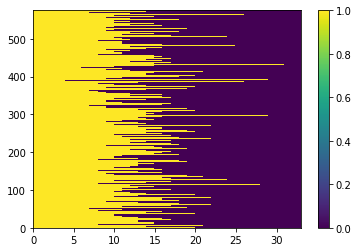

In [ ]:
#Our dataset is now in the padded variable, we can view its dimensions below:
import matplotlib.pyplot as plt
plt.pcolormesh(padded>0)
plt.colorbar()

In [ ]:
# masking

#If we directly send padded to BERT, that would slightly confuse it.
#We need to create another variable to tell it to ignore (mask) the padding we've added when it's processing its input. 
#That's what attention_mask is:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(575, 33)

# training BERT

In [ ]:
%%time
import torch 
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

CPU times: user 59 s, sys: 747 ms, total: 59.7 s
Wall time: 29.8 s


In [ ]:
features = last_hidden_states[0][:,0,:].numpy()
labels = batch_1['topic']
last_hidden_states[0][:, 0, :].shape

torch.Size([575, 768])

In [ ]:
# train /test 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
# check the balance
#train
print (train_labels.value_counts())

1    97
2    76
3    75
4    71
5    43
6    39
7    30
Name: topic, dtype: int64


In [ ]:
# check the balance tes 
# check the balance
print (test_labels.value_counts())

1    35
3    25
2    25
4    17
6    15
5    15
7    12
Name: topic, dtype: int64


#Random Forest Classifier

In [ ]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

## pipeline
model = pipeline.Pipeline([  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(train_features,train_labels)
## test

predicted = model.predict(test_features)
predicted_prob = model.predict_proba(test_features)

In [ ]:
# evaluating random forest
import sklearn.metrics as metrics

classes = np.unique(test_labels)
y_test_array = pd.get_dummies(test_labels, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(test_labels, predicted)
auc = metrics.roc_auc_score(test_labels, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(test_labels, predicted))    

Accuracy: 0.35
Auc: 0.74
Detail:
              precision    recall  f1-score   support

           1       0.38      0.66      0.48        35
           2       0.34      0.48      0.40        25
           3       0.31      0.32      0.31        25
           4       0.27      0.24      0.25        17
           5       0.67      0.13      0.22        15
           6       0.50      0.13      0.21        15
           7       0.00      0.00      0.00        12

    accuracy                           0.35       144
   macro avg       0.35      0.28      0.27       144
weighted avg       0.36      0.35      0.31       144



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# cross vlidation evaluating random forest
from numpy import mean , std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, train_features, train_labels, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.513 (0.065)


In [ ]:
model.fit(train_features, train_labels)
model.score(test_features, test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.4791666666666667

#logistic regression

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_clf.score(test_features, test_labels)

0.5555555555555556

In [ ]:
from sklearn.metrics import confusion_matrix 
y_pred=lr_clf.predict(test_features)
cmat = confusion_matrix(test_labels, y_pred) 
cmat 

array([[23,  0,  0,  4,  2,  1,  1],
       [ 3, 19, 10,  1,  0,  0,  0],
       [ 2,  9,  8,  1,  1,  2,  1],
       [ 3,  1,  4, 11,  0,  0,  1],
       [ 2,  2,  2,  2,  6,  1,  0],
       [ 1,  0,  0,  0,  1,  9,  0],
       [ 3,  0,  0,  2,  1,  0,  4]])

In [ ]:
cmat.diagonal()/cmat.sum(axis=1) 

array([0.74193548, 0.57575758, 0.33333333, 0.55      , 0.4       ,
       0.81818182, 0.4       ])

#Tune logistic regression 


In [ ]:
# Create first pipeline for base without reducing features.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(train_features,train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   52.0s finished


In [ ]:
best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics
classes = best_clf.predict(test_features)
accuracy = metrics.accuracy_score(classes, test_labels)
    
#balanced_accuracy = metrics.balanced_accuracy_score(classes, test_labels)


print(metrics.classification_report(classes,test_labels))

              precision    recall  f1-score   support

           1       0.69      0.57      0.62        42
           2       0.36      0.45      0.40        20
           3       0.36      0.31      0.33        29
           4       0.47      0.40      0.43        20
           5       0.47      0.44      0.45        16
           6       0.47      0.64      0.54        11
           7       0.00      0.00      0.00         6

    accuracy                           0.44       144
   macro avg       0.40      0.40      0.40       144
weighted avg       0.48      0.44      0.46       144



In [ ]:
accuracy

0.4444444444444444

# try scaling

In [ ]:
# Normalize using MinMaxScaler to constrain values to between 0 and 1.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
scaler = StandardScaler(feature_range = (0,1))

scaler.fit(train_features)
X_train = scaler.transform(train_features)
X_test = scaler.transform(test_features)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, train_labels)

lr_clf.score(X_test, test_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.4861111111111111

# scaling is bad here 

# Retry with logistic regression from scratch

In [ ]:
# Initial logistic regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.61)
model_base = clf.fit(train_features, train_labels)

y_pred = model_base.predict(test_features)
model_base.score(test_features, test_labels)

print("Model accuracy is", model_base.score(test_features, test_labels))

Model accuracy is 0.5555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
